In [1]:
import sklearn
sklearn.__version__

'1.3.1'

In [2]:


from sklearn.datasets import make_blobs, make_moons, make_circles
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

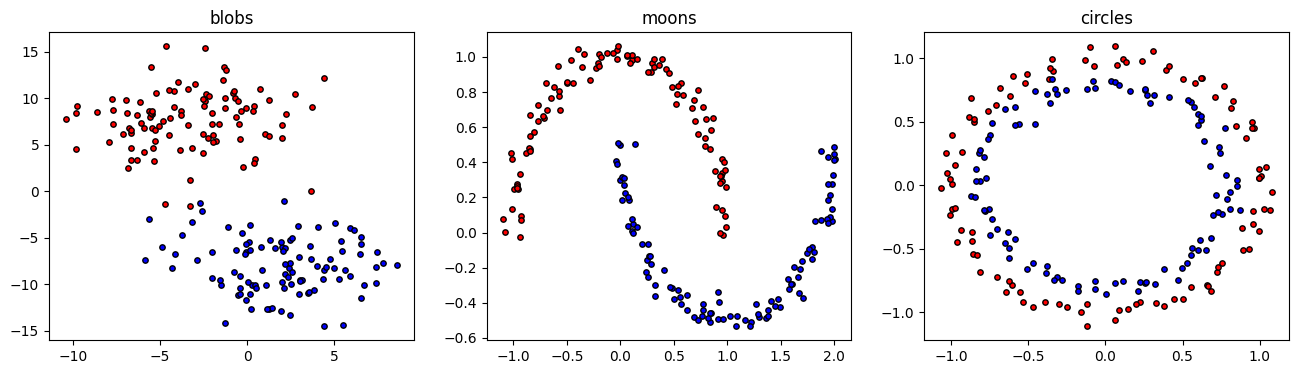

In [3]:
n_features = 2
n_samples = 200
n_classes = 2

X_blobs, y_blobs = make_blobs(n_features=n_features,
                              n_samples=n_samples,
                              centers=n_classes,
                              random_state=2023, cluster_std=3)
X_moons, y_moons = make_moons(n_samples=n_samples, noise=0.05)
X_circle, y_circle = make_circles(n_samples=n_samples, noise=0.05)

list_of_data = [(X_blobs, y_blobs, "blobs"), (X_moons, y_moons, "moons"), (X_circle, y_circle, "circles")]

_, axs = plt.subplots(ncols=3, nrows=1, figsize=(16, 4))
for ax, (X, y, name) in zip(axs, list_of_data):
  for i, color in zip(range(n_classes), ["red", "blue"]):
      idx = np.where(y == i)
      ax.scatter(
          X[idx, 0],
          X[idx, 1],
          c=color,

          edgecolor="black",
          s=15)
  ax.set_title(name)

In [4]:
list_of_classifiers = [LogisticRegression, DecisionTreeClassifier, SVC, RandomForestClassifier]

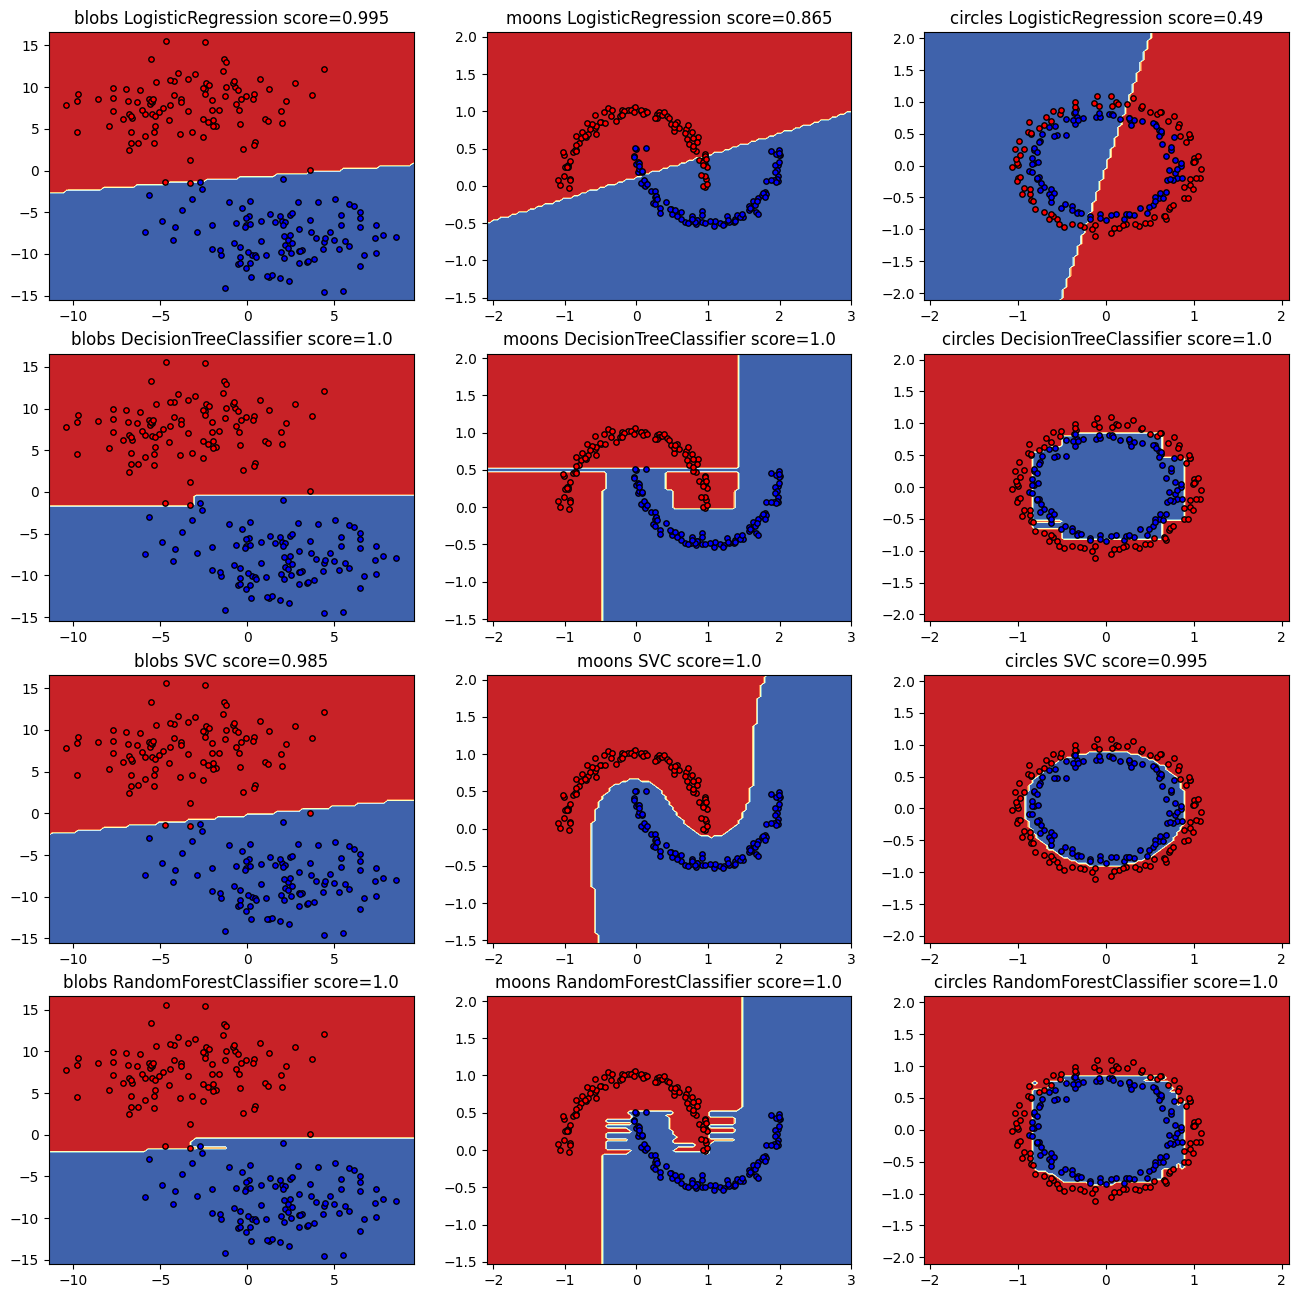

In [5]:
_, axs = plt.subplots(ncols=3, nrows=4, figsize=(16, 16))
for i_data, (X, y, data_name) in enumerate(list_of_data):
  for i_clf, classifier in enumerate(list_of_classifiers):
    ax = axs[i_clf, i_data]

    clf_name = classifier.__name__
    fitted_clf = classifier(random_state=2023).fit(X, y)
    y_pred = fitted_clf.predict(X)
    score = accuracy_score(y, y_pred)
    DecisionBoundaryDisplay.from_estimator(
        fitted_clf,
        X,
        cmap=plt.cm.RdYlBu,
        response_method="predict",
        ax=ax
    )
    ax.set_title(f"{data_name} {clf_name} score={round(score, 3)}")

    for i, color in zip(range(n_classes), ["red", "blue"]):
      idx = np.where(y == i)
      ax.scatter(
          X[idx, 0],
          X[idx, 1],
          c=color,
          edgecolor="black",
          s=15)

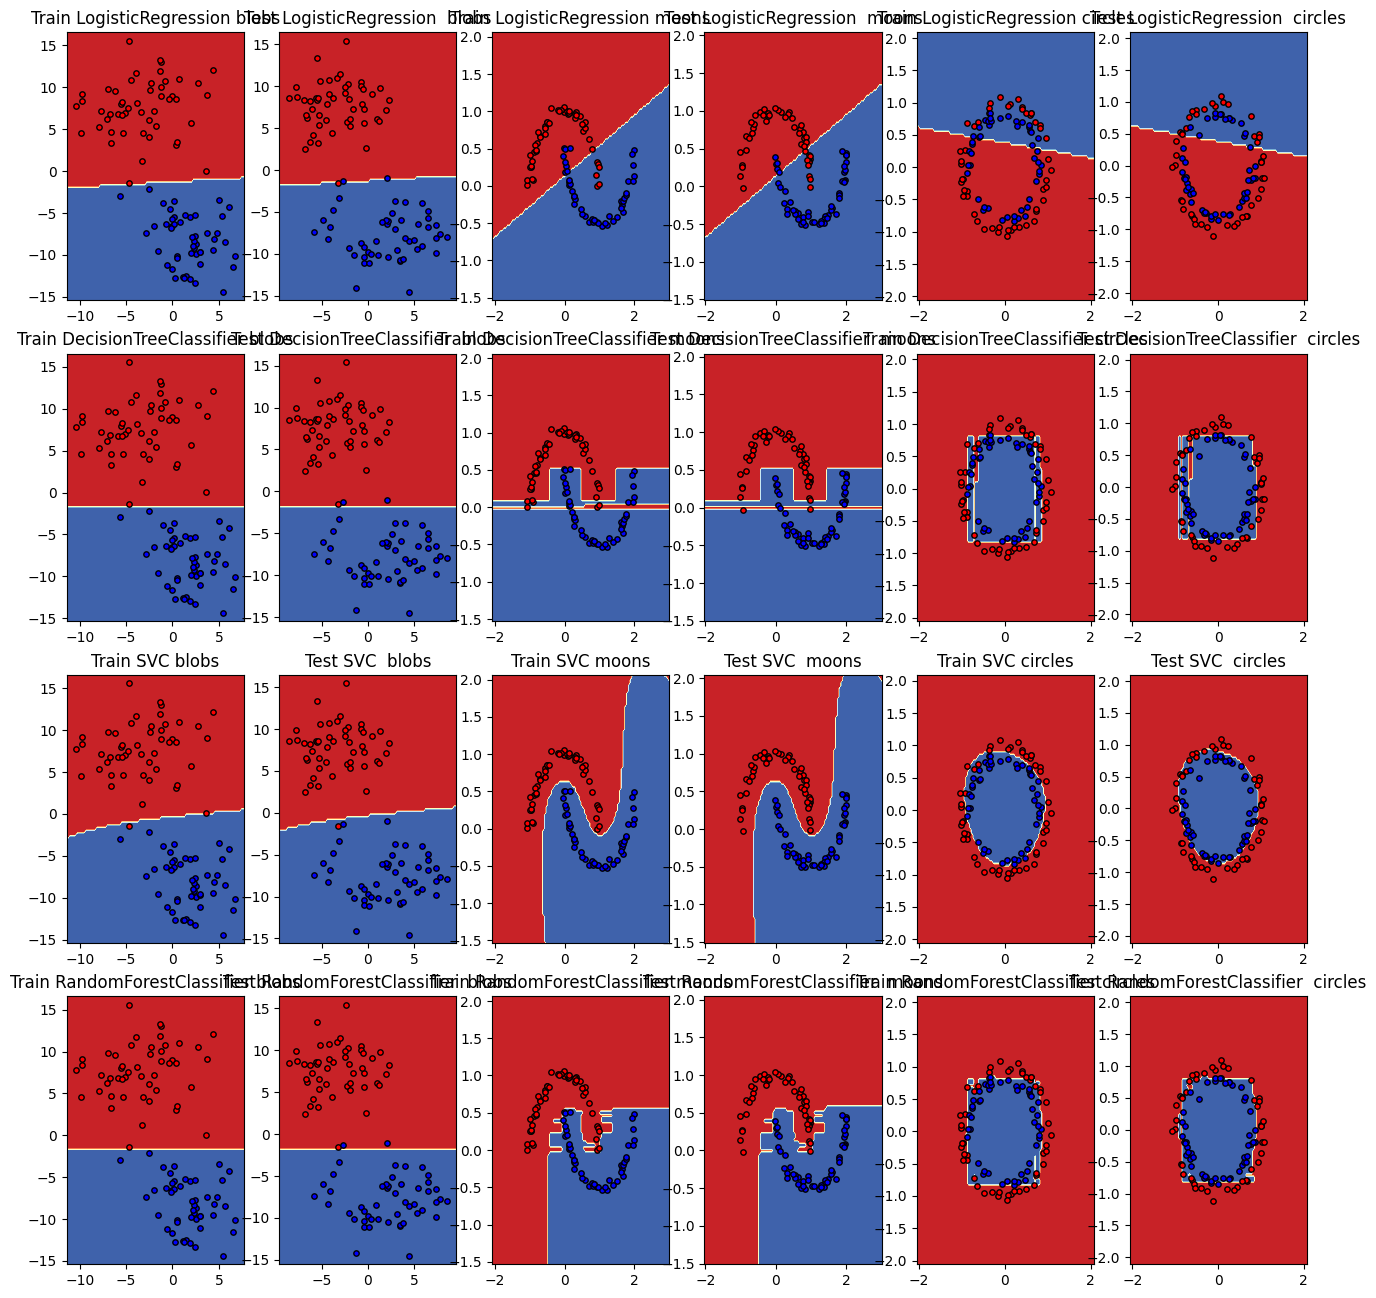

In [6]:
_, axs = plt.subplots(ncols=6, nrows=4, figsize=(16, 16))
metric_values = []
for i_data, (X, y, data_name) in enumerate(list_of_data):
  X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                      test_size=0.5,
                                                      random_state=0)

  for i_clf, classifier in enumerate(list_of_classifiers):

    ax = axs[i_clf, 2*i_data]

    clf_name = classifier.__name__
    fitted_clf = classifier(random_state=2023).fit(X_train, y_train)
    y_pred_train = fitted_clf.predict(X_train)
    score_train = accuracy_score(y_true=y_train, y_pred=y_pred_train)
    DecisionBoundaryDisplay.from_estimator(
        fitted_clf,
        X_train,
        cmap=plt.cm.RdYlBu,
        response_method="predict",
        ax=ax
    )
    ax.set_title(f"Train {clf_name} {data_name}")

    for i, color in zip(range(n_classes), ["red", "blue"]):
      idx = np.where(y_train == i)
      ax.scatter(
          X_train[idx, 0],
          X_train[idx, 1],
          c=color,
          edgecolor="black",
          s=15)

    ax = axs[i_clf, 2*i_data+1]
    y_pred_test = fitted_clf.predict(X_test)
    score_test = accuracy_score(y_true=y_test, y_pred=y_pred_train)
    DecisionBoundaryDisplay.from_estimator(
        fitted_clf,
        X_test,
        response_method="predict",
                cmap=plt.cm.RdYlBu,
        ax=ax
    )
    ax.set_title(f"Test {clf_name}  {data_name}")

    metric_values.append({"data_name": data_name,
                          "clf_name": clf_name,
                          "score": score_train,
                          "subset":"train"})
    metric_values.append({"data_name": data_name,
                          "clf_name": clf_name,
                          "score": score_test,
                          "subset":"test"})

    for i, color in zip(range(n_classes), ["red", "blue"]):
      idx = np.where(y_test == i)
      ax.scatter(
          X_test[idx, 0],
          X_test[idx, 1],
          c=color,

          edgecolor="black",
          s=15)

In [7]:
pd.DataFrame(metric_values).pivot(columns=["data_name", "subset"],
                                  index="clf_name", values="score")

data_name              blobs       moons       circles      
subset                 train  test train  test   train  test
clf_name                                                    
DecisionTreeClassifier  1.00  0.46  1.00  0.50    1.00  0.48
LogisticRegression      1.00  0.46  0.86  0.48    0.53  0.41
RandomForestClassifier  1.00  0.46  1.00  0.50    1.00  0.48
SVC                     0.99  0.47  1.00  0.50    0.93  0.47

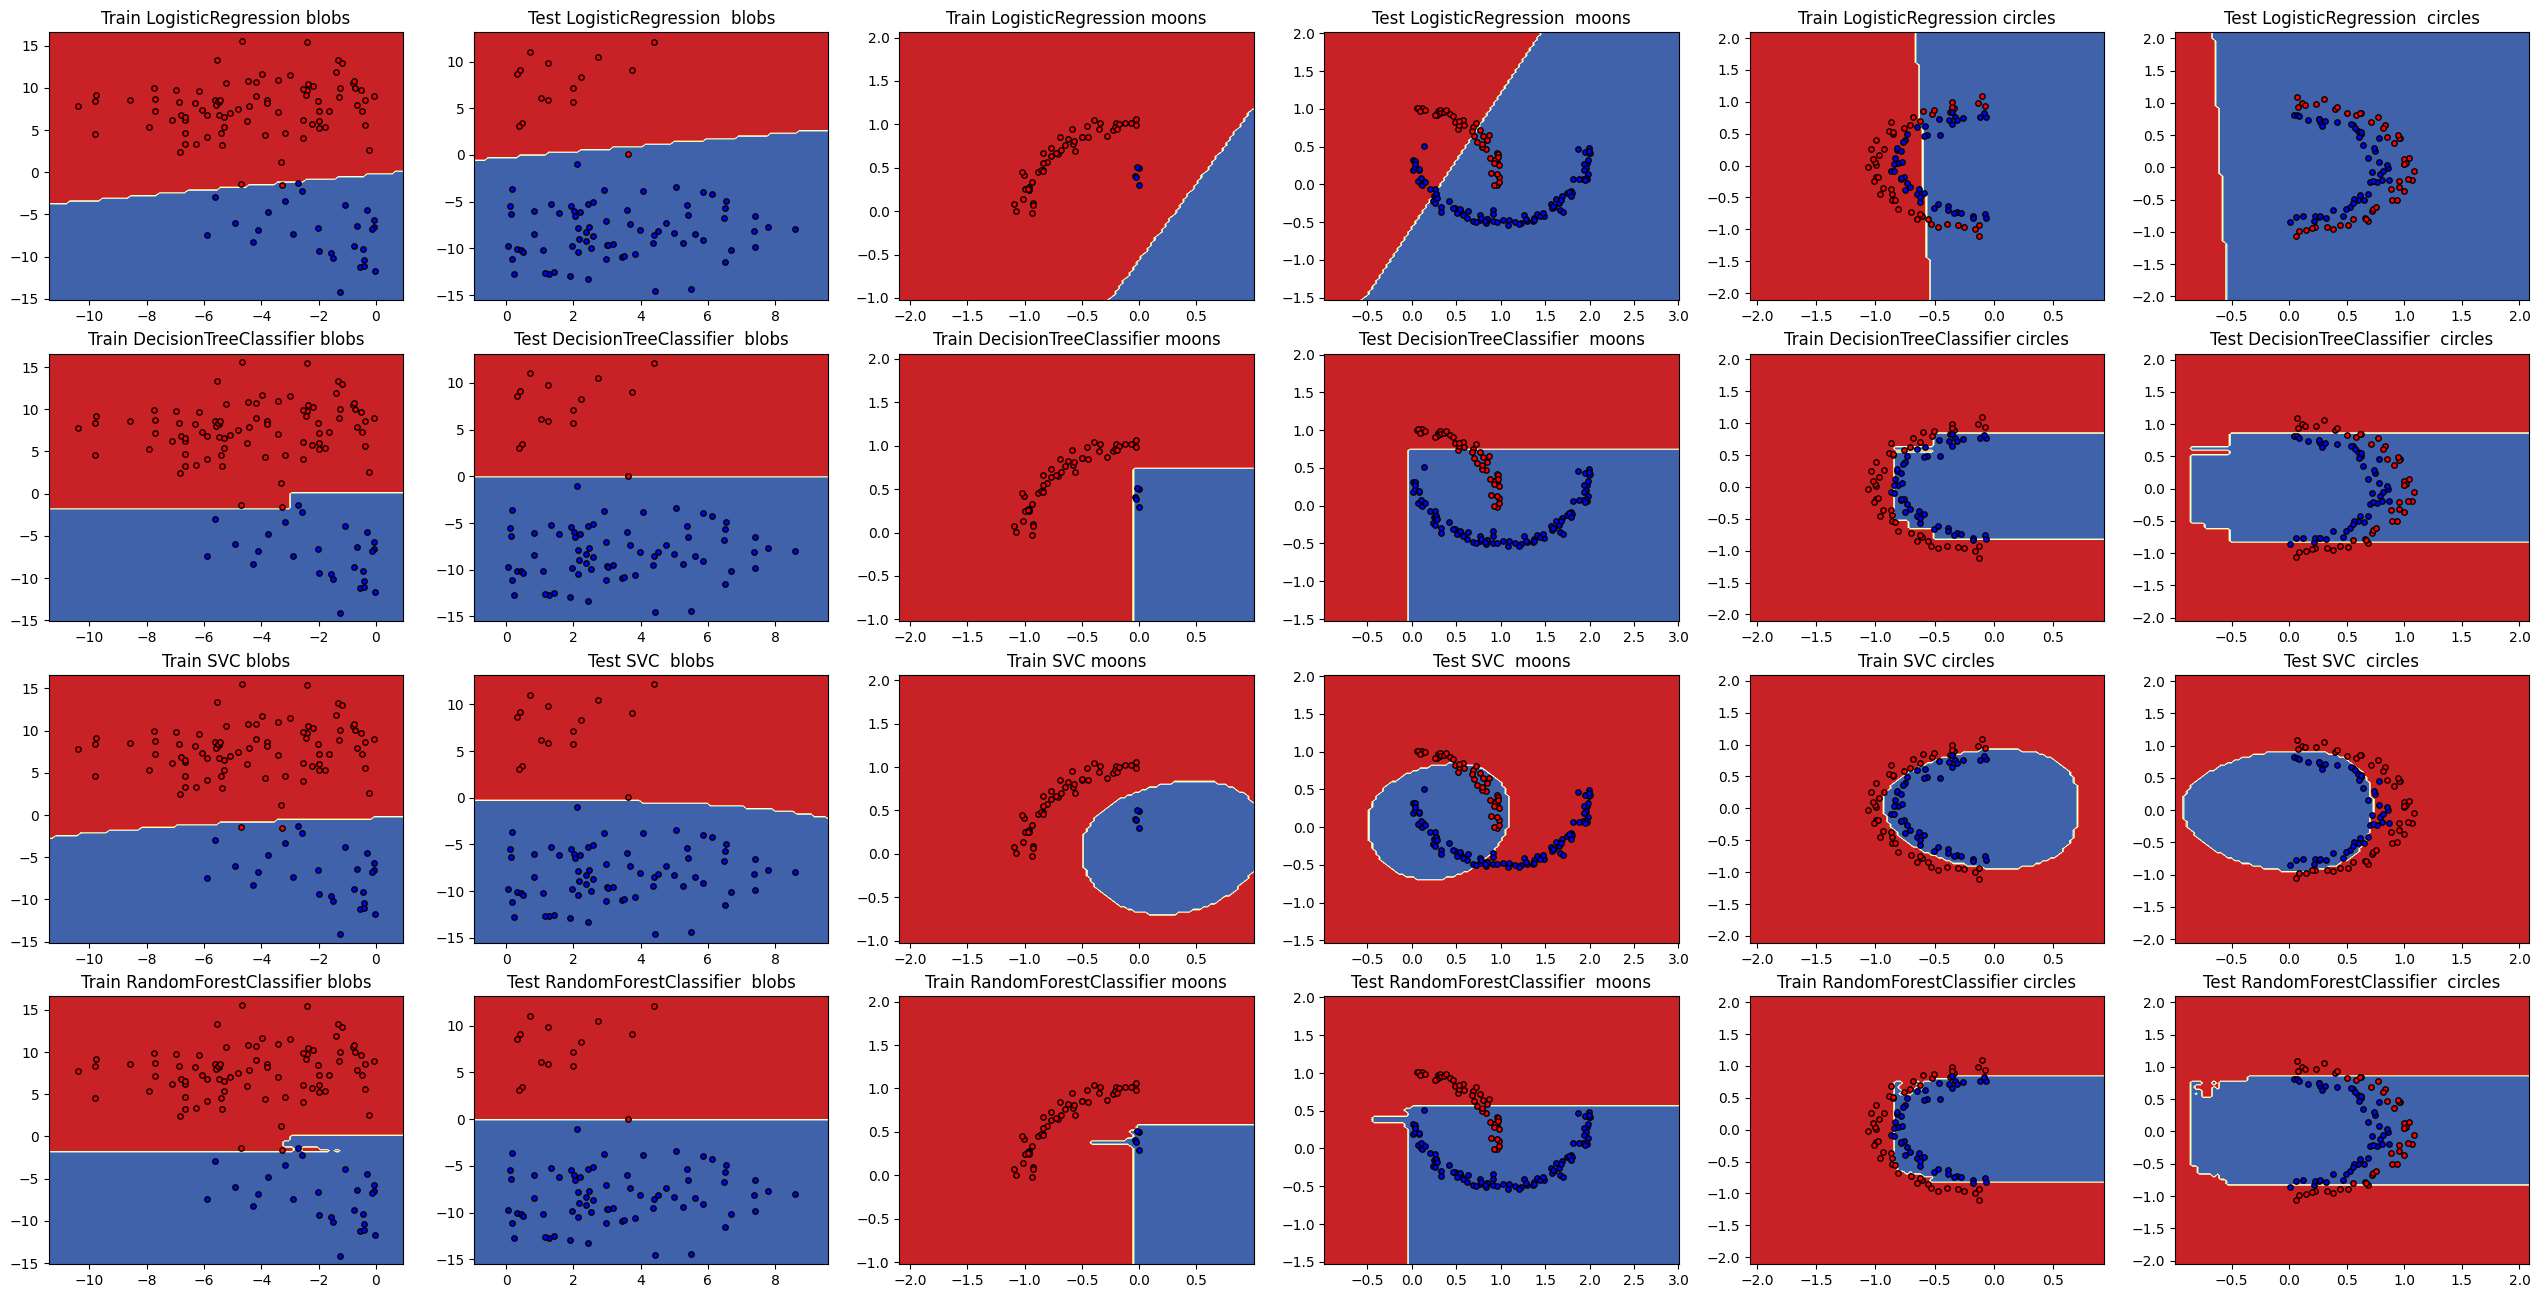

In [8]:
_, axs = plt.subplots(ncols=6, nrows=4, figsize=(32, 16))
metric_values = []
for i_data, (X, y, data_name) in enumerate(list_of_data):

  mask_train = X[:, 0] <= 0
  X_train, y_train = X[mask_train], y[mask_train]
  X_test, y_test = X[~mask_train], y[~mask_train]

  for i_clf, classifier in enumerate(list_of_classifiers):

    ax = axs[i_clf, 2*i_data]

    clf_name = classifier.__name__
    fitted_clf = classifier(random_state=2023).fit(X_train, y_train)
    y_pred_train = fitted_clf.predict(X_train)
    score_train = accuracy_score(y_true=y_train, y_pred=y_pred_train)
    DecisionBoundaryDisplay.from_estimator(
        fitted_clf,
        X_train,
        cmap=plt.cm.RdYlBu,
        response_method="predict",
        ax=ax
    )
    ax.set_title(f"Train {clf_name} {data_name}")

    for i, color in zip(range(n_classes), ["red", "blue"]):
      idx = np.where(y_train == i)
      ax.scatter(
          X_train[idx, 0],
          X_train[idx, 1],
          c=color,

          edgecolor="black",
          s=15)

    ax = axs[i_clf, 2*i_data+1]
    y_pred_test = fitted_clf.predict(X_test)
    score_test = accuracy_score(y_true=y_test, y_pred=y_pred_test)
    DecisionBoundaryDisplay.from_estimator(
        fitted_clf,
        X_test,
        cmap=plt.cm.RdYlBu,
        response_method="predict",
        ax=ax
    )
    ax.set_title(f"Test {clf_name}  {data_name}")

    metric_values.append({"data_name": data_name,
                          "clf_name": clf_name,
                          "score": score_train,
                          "subset":"train"})
    metric_values.append({"data_name": data_name,
                          "clf_name": clf_name,
                          "score": score_test,
                          "subset":"test"})

    for i, color in zip(range(n_classes), ["red", "blue"]):
      idx = np.where(y_test == i)
      ax.scatter(
          X_test[idx, 0],
          X_test[idx, 1],
          c=color,

          edgecolor="black",
          s=15)

In [9]:
pd.DataFrame(metric_values).pivot(columns=["data_name", "subset"],
                                  index="clf_name", values="score")

data_name                  blobs               moons             circles   
subset                     train      test     train      test     train   
clf_name                                                                   
DecisionTreeClassifier  1.000000  1.000000  1.000000  0.812500  1.000000  \
LogisticRegression      0.991071  0.988636  0.910714  0.715278  0.561224   
RandomForestClassifier  1.000000  1.000000  1.000000  0.861111  1.000000   
SVC                     0.982143  1.000000  1.000000  0.388889  0.989796   

data_name                         
subset                      test  
clf_name                          
DecisionTreeClassifier  0.676471  
LogisticRegression      0.500000  
RandomForestClassifier  0.656863  
SVC                     0.852941

In [10]:
list_of_classifiers_with_params_grid = [(LogisticRegression, {'penalty': ['l2'], 'C': [0.1, 1, 10, 100]}), #[(LogisticRegression, {'penalty': [None, 'l2'], 'C': [0.1, 1, 10, 100]}),
                                        (DecisionTreeClassifier, {'max_depth': [1, 5, 10, 20, None], 'min_samples_split': [2, 5, 10, 20]}),
                                        (SVC, {'kernel':('linear', 'rbf'), 'C':[0.1, 1, 10, 100]}),
                                        (RandomForestClassifier, {'max_depth': [1, 5, 10, 20, None], 'min_samples_split': [2, 5, 10, 20], "n_estimators": [5, 10, 20, 50, 100, 200]})]

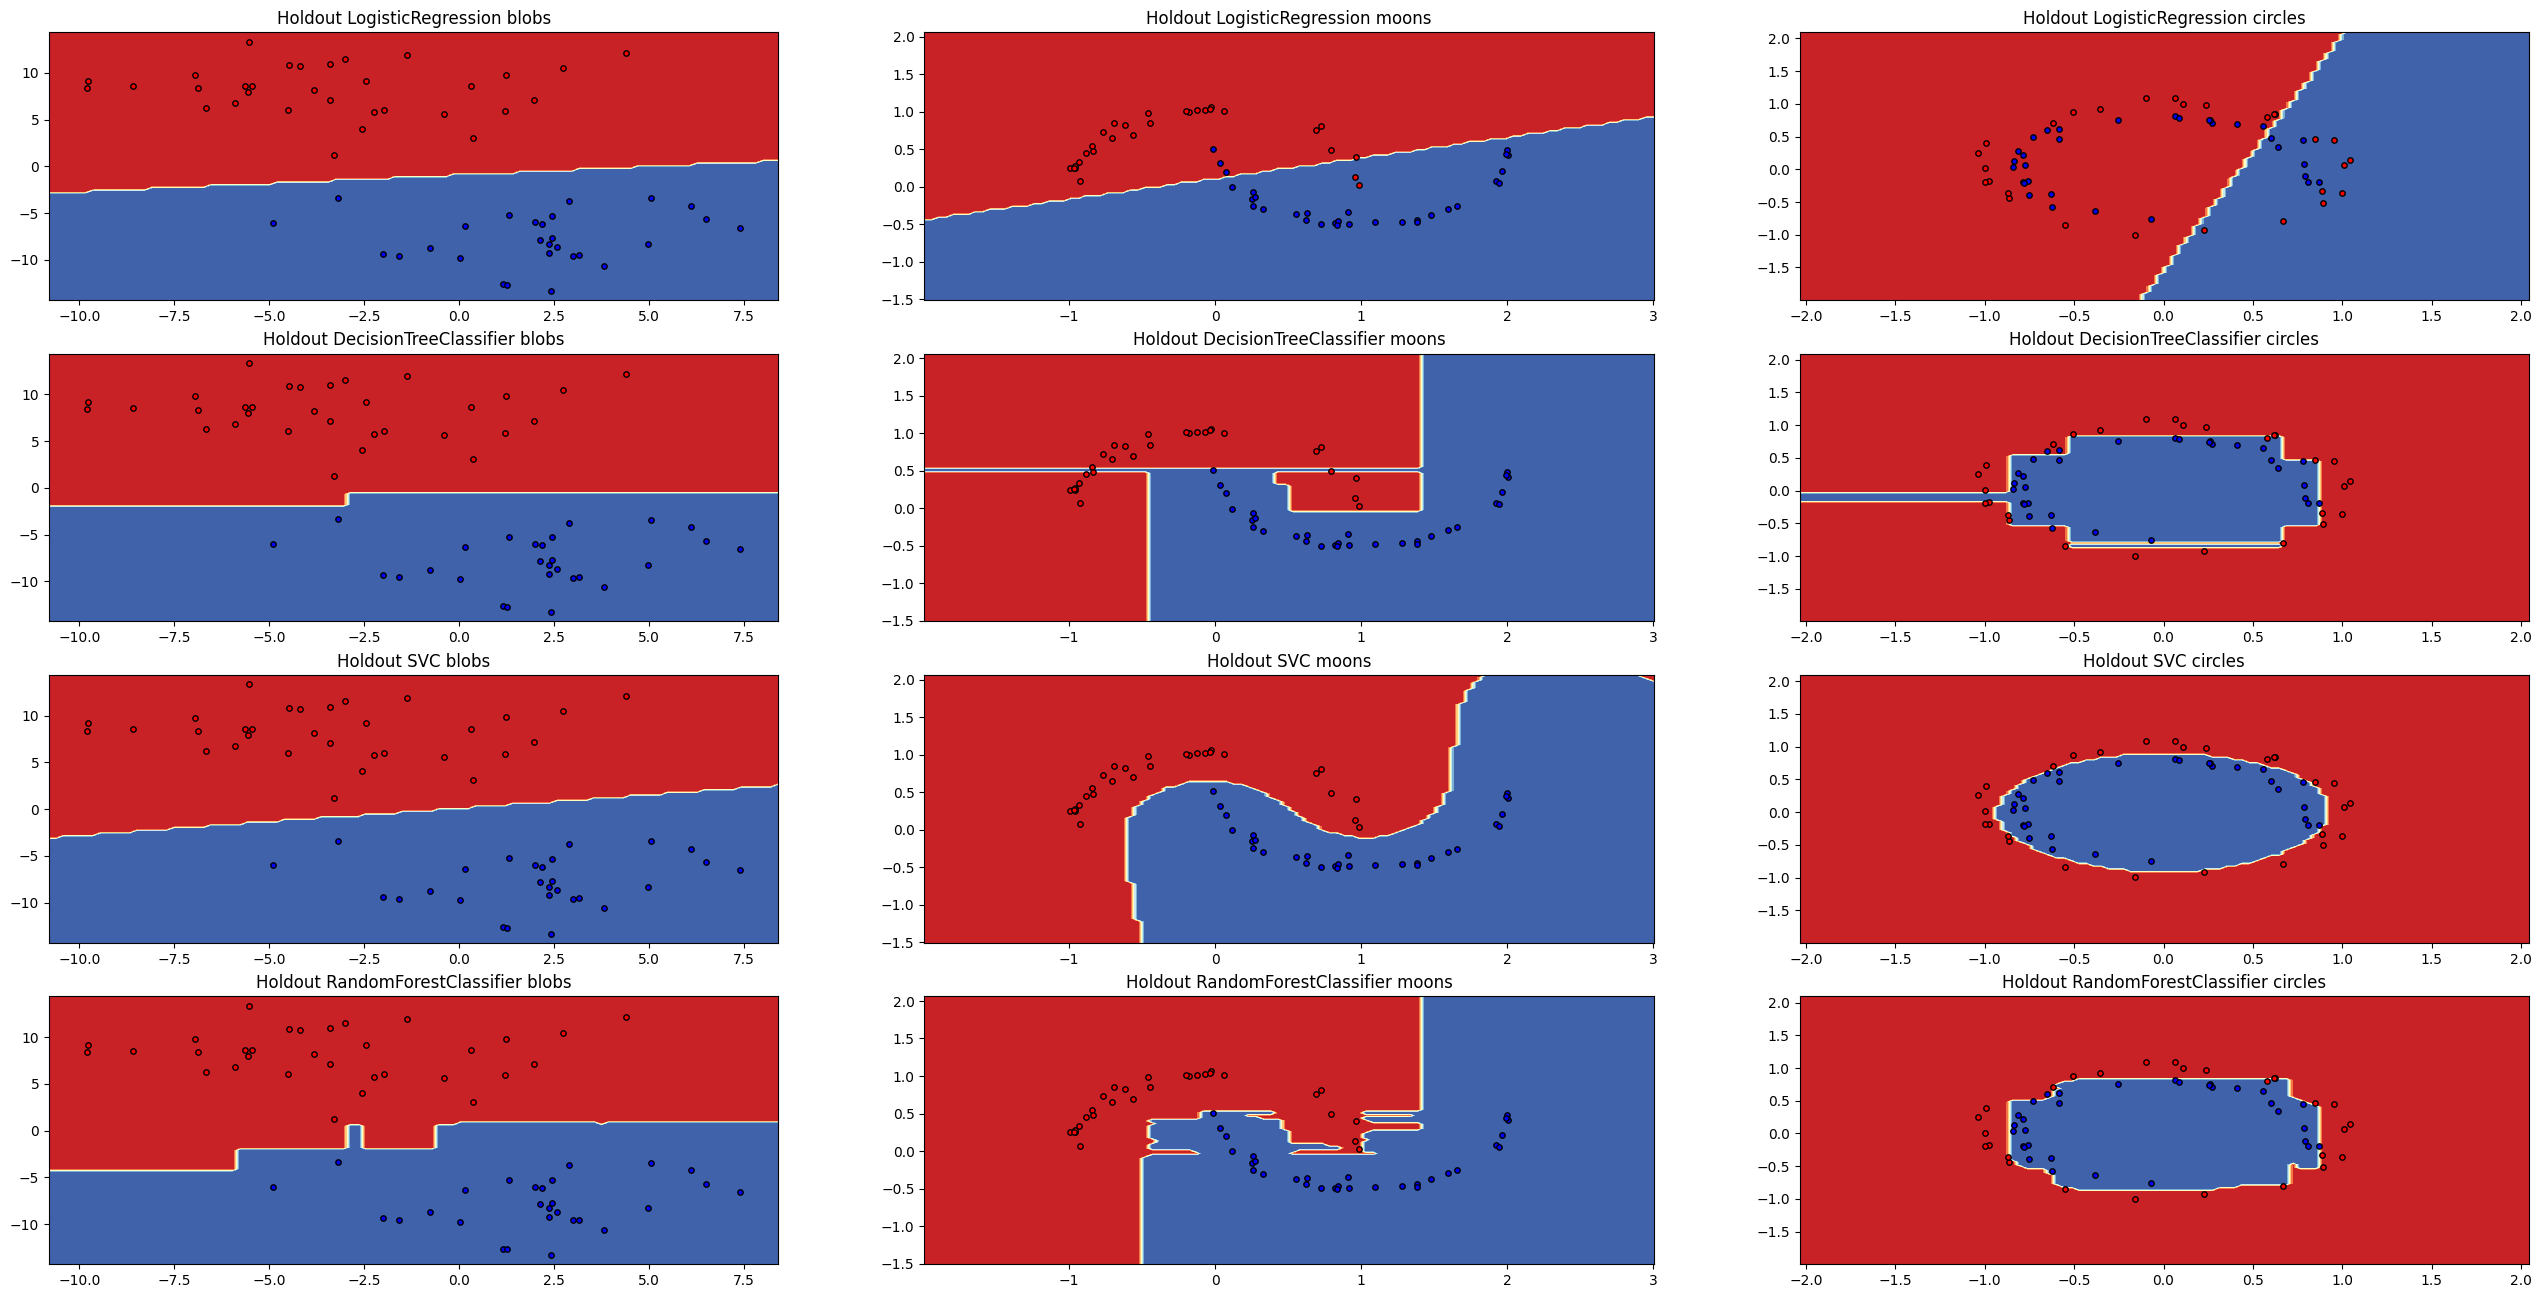

In [11]:
_, axs = plt.subplots(ncols=3, nrows=4, figsize=(32, 16))
metric_values = []
best_params = []
for i_data, (X, y, data_name) in enumerate(list_of_data):
  X_search, X_holdout, y_search, y_holdout = train_test_split(X, y,
                                                      test_size=0.3,
                                                      random_state=42)

  for i_clf, (classifier, parameters) in enumerate(list_of_classifiers_with_params_grid):

    ax = axs[i_clf, i_data]

    clf_name = classifier.__name__

    clf = GridSearchCV(classifier(random_state=2023), parameters)

    fitted_clf = fitted_clf = clf.fit(X_search, y_search)
    y_pred_holdout = fitted_clf.predict(X_search)
    y_pred_search = fitted_clf.predict(X_search)

    score_holdout = accuracy_score(y_true=y_search, y_pred=y_pred_holdout)
    score_search = accuracy_score(y_true=y_search, y_pred=y_pred_search)


    DecisionBoundaryDisplay.from_estimator(
        fitted_clf,
        X_holdout,
        cmap=plt.cm.RdYlBu,
        response_method="predict",
        ax=ax
    )
    ax.set_title(f"Holdout {clf_name} {data_name}")


    metric_values.append({"data_name": data_name,
                          "clf_name": clf_name,
                          "score": score_search,
                          "subset":"cv_subset"})
    metric_values.append({"data_name": data_name,
                          "clf_name": clf_name,
                          "score": score_holdout,
                          "subset":"holdout"})
    best_params.append({"data_name": data_name,
                        "clf_name": clf_name,
                        "best_params": fitted_clf.best_params_})

    for i, color in zip(range(n_classes), ["red", "blue"]):
      idx = np.where(y_holdout == i)
      ax.scatter(
          X_holdout[idx, 0],
          X_holdout[idx, 1],
          c=color,

          edgecolor="black",
          s=15)

In [12]:
pd.DataFrame(metric_values).pivot(columns=["data_name", "subset"],
                                  index="clf_name", values="score")

data_name                  blobs               moons           circles   
subset                 cv_subset   holdout cv_subset holdout cv_subset   
clf_name                                                                 
DecisionTreeClassifier  1.000000  1.000000      1.00    1.00  0.992857  \
LogisticRegression      0.985714  0.985714      0.85    0.85  0.521429   
RandomForestClassifier  0.992857  0.992857      1.00    1.00  1.000000   
SVC                     0.978571  0.978571      1.00    1.00  0.992857   

data_name                         
subset                   holdout  
clf_name                          
DecisionTreeClassifier  0.992857  
LogisticRegression      0.521429  
RandomForestClassifier  1.000000  
SVC                     0.992857

In [13]:
best_params

[{'data_name': 'blobs',
  'clf_name': 'LogisticRegression',
  'best_params': {'C': 10, 'penalty': 'l2'}},
 {'data_name': 'blobs',
  'clf_name': 'DecisionTreeClassifier',
  'best_params': {'max_depth': 5, 'min_samples_split': 2}},
 {'data_name': 'blobs',
  'clf_name': 'SVC',
  'best_params': {'C': 0.1, 'kernel': 'rbf'}},
 {'data_name': 'blobs',
  'clf_name': 'RandomForestClassifier',
  'best_params': {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 5}},
 {'data_name': 'moons',
  'clf_name': 'LogisticRegression',
  'best_params': {'C': 1, 'penalty': 'l2'}},
 {'data_name': 'moons',
  'clf_name': 'DecisionTreeClassifier',
  'best_params': {'max_depth': 10, 'min_samples_split': 2}},
 {'data_name': 'moons',
  'clf_name': 'SVC',
  'best_params': {'C': 1, 'kernel': 'rbf'}},
 {'data_name': 'moons',
  'clf_name': 'RandomForestClassifier',
  'best_params': {'max_depth': 10,
   'min_samples_split': 2,
   'n_estimators': 100}},
 {'data_name': 'circles',
  'clf_name': 'LogisticRegression',
 

In [14]:
pd.DataFrame(best_params).pivot(columns=["data_name"],
                                  index="clf_name", values="best_params")

data_name,blobs,circles,moons
clf_name,,,
DecisionTreeClassifier,"{'max_depth': 5, 'min_samples_split': 2}","{'max_depth': 10, 'min_samples_split': 5}","{'max_depth': 10, 'min_samples_split': 2}"
LogisticRegression,"{'C': 10, 'penalty': 'l2'}","{'C': 10, 'penalty': 'l2'}","{'C': 1, 'penalty': 'l2'}"
RandomForestClassifier,"{'max_depth': 5, 'min_samples_split': 5, 'n_es...","{'max_depth': 20, 'min_samples_split': 2, 'n_e...","{'max_depth': 10, 'min_samples_split': 2, 'n_e..."
SVC,"{'C': 0.1, 'kernel': 'rbf'}","{'C': 10, 'kernel': 'rbf'}","{'C': 1, 'kernel': 'rbf'}"


C:\Users\Илья\AppData\Local\Temp\ipykernel_12260\362485685.py:50: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
C:\Users\Илья\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Илья\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _che

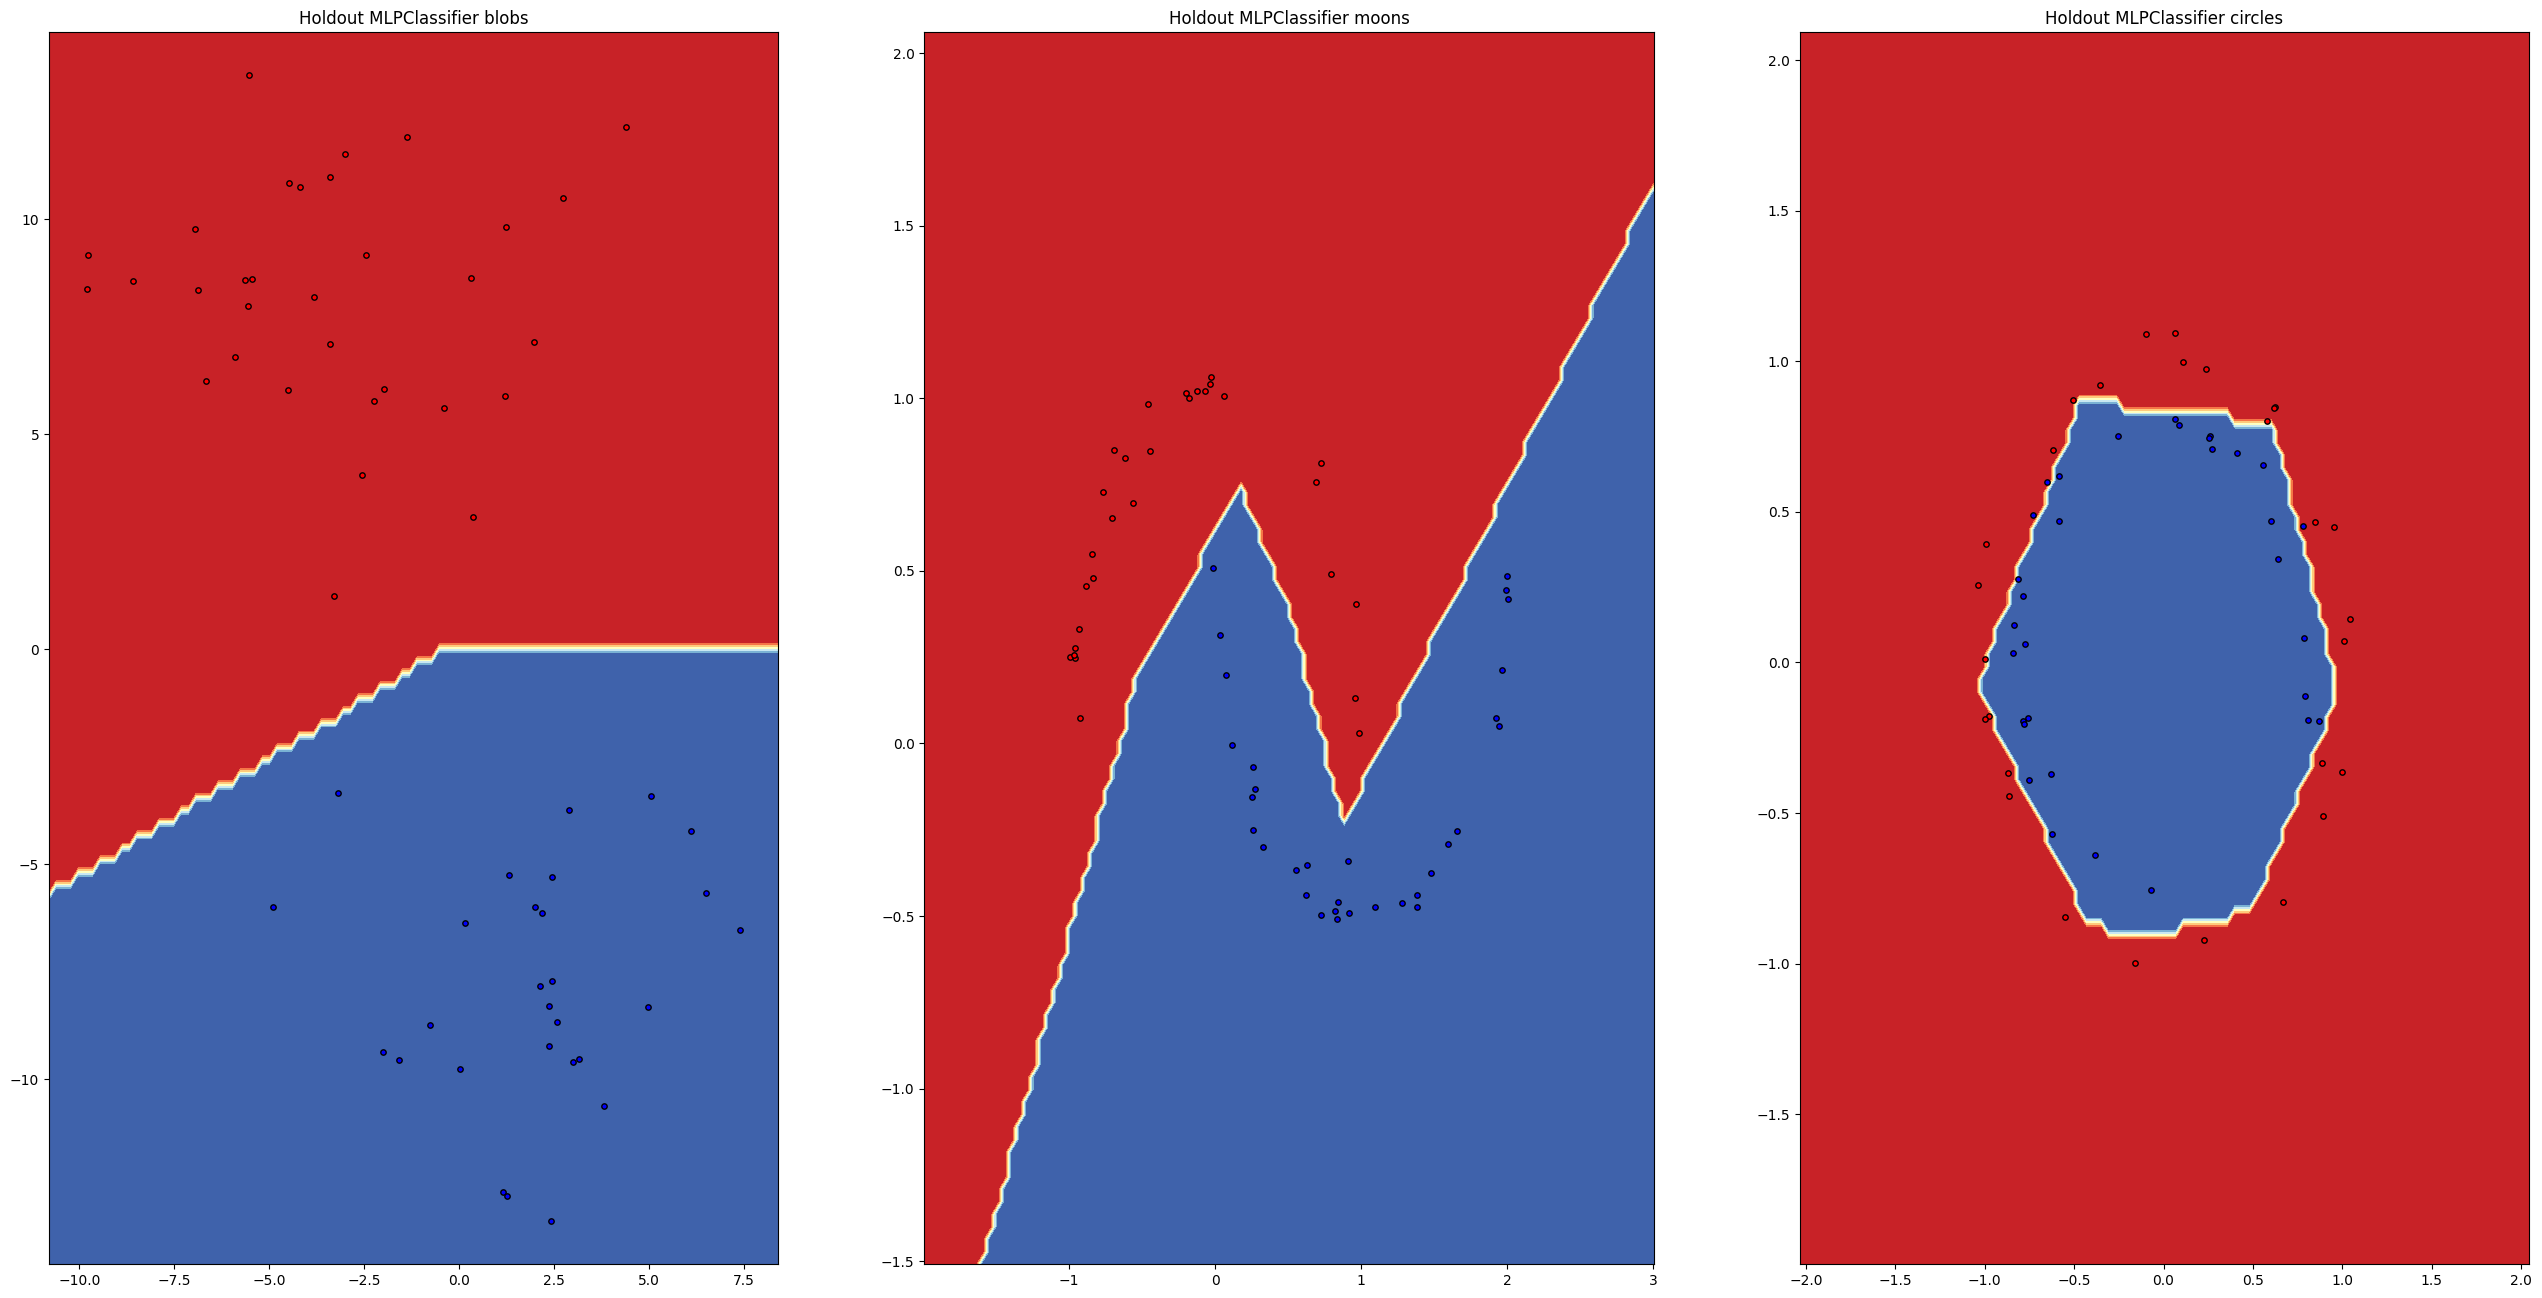

In [15]:
_, axs = plt.subplots(ncols=3, nrows=1, figsize=(32, 16))
metric_values = []
best_params = []
for i_data, (X, y, data_name) in enumerate(list_of_data):
  X_search, X_holdout, y_search, y_holdout = train_test_split(X, y,
                                                      test_size=0.3,
                                                      random_state=42)
  classifier = MLPClassifier
  parameters = {"solver" : ['lbfgs'], "alpha": [1e-5, 1e-3, 1, 10],
                "hidden_layer_sizes": [(5, 2), (3,2), (6, 2), (6,6)]}

  ax = axs[i_data]

  clf_name = classifier.__name__

  clf = GridSearchCV(classifier(random_state=2023), parameters)

  fitted_clf = fitted_clf = clf.fit(X_search, y_search)
  y_pred_holdout = fitted_clf.predict(X_search)
  y_pred_search = fitted_clf.predict(X_search)

  score_holdout = accuracy_score(y_true=y_search, y_pred=y_pred_holdout)
  score_search = accuracy_score(y_true=y_search, y_pred=y_pred_search)


  DecisionBoundaryDisplay.from_estimator(
      fitted_clf,
      X_holdout,
      cmap=plt.cm.RdYlBu,
      response_method="predict",
      ax=ax
  )
  ax.set_title(f"Holdout {clf_name} {data_name}")


  metric_values.append({"data_name": data_name,
                        "clf_name": clf_name,
                        "score": score_search,
                        "subset":"cv_subset"})
  metric_values.append({"data_name": data_name,
                        "clf_name": clf_name,
                        "score": score_holdout,
                        "subset":"holdout"})
  best_params.append({"data_name": data_name,
                      "clf_name": clf_name,
                      "best_params": fitted_clf.best_params_})

  for i, color in zip(range(n_classes), ["red", "blue"]):
    idx = np.where(y_holdout == i)
    ax.scatter(
        X_holdout[idx, 0],
        X_holdout[idx, 1],
        c=color,
        cmap=plt.cm.RdYlBu,
        edgecolor="black",
        s=15)

In [16]:
best_params

[{'data_name': 'blobs',
  'clf_name': 'MLPClassifier',
  'best_params': {'alpha': 1e-05,
   'hidden_layer_sizes': (5, 2),
   'solver': 'lbfgs'}},
 {'data_name': 'moons',
  'clf_name': 'MLPClassifier',
  'best_params': {'alpha': 0.001,
   'hidden_layer_sizes': (6, 6),
   'solver': 'lbfgs'}},
 {'data_name': 'circles',
  'clf_name': 'MLPClassifier',
  'best_params': {'alpha': 1,
   'hidden_layer_sizes': (6, 6),
   'solver': 'lbfgs'}}]

In [17]:
pd.DataFrame(best_params).pivot(columns=["data_name"],
                                  index="clf_name", values="best_params")

data_name,blobs,circles,moons
clf_name,,,
MLPClassifier,"{'alpha': 1e-05, 'hidden_layer_sizes': (5, 2),...","{'alpha': 1, 'hidden_layer_sizes': (6, 6), 'so...","{'alpha': 0.001, 'hidden_layer_sizes': (6, 6),..."
